<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/3%20Multinomial%20Logistic%20Regression/Multinomial_Regression_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Logistic Regression

## Introduction

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection 

In [13]:
X, y = datasets.make_classification(
                  n_samples=1000,
                  n_features=12,
                  n_informative=3,
                  n_classes=6,
                  n_clusters_per_class=1,
                  random_state=1)
print("X size:   ", X.shape)
print("y size:   ", y.shape)
print("y classes:", np.unique(y))

X size:    (1000, 12)
y size:    (1000,)
y classes: [0 1 2 3 4 5]


In [14]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y,
                                 train_size = .75,
                                 random_state=2)
print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("y_train classes:", np.unique(y))
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)
print("y_test classes:", np.unique(y))

X_train size: (750, 12)
y_train size: (750,)
y_train classes: [0 1 2 3 4 5]
X_test size: (250, 12)
y_test size: (250,)
y_test classes: [0 1 2 3 4 5]


In [15]:
model = linear_model.LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy Score:", a_score)
print("Confusion matrix:\n", c_matrix)

Accuracy Score: 0.792
Confusion matrix:
 [[27  0  1  9  0  0]
 [ 3 36  0 15  0  0]
 [ 0  1 42  1  2  0]
 [ 2  3  0 28  0  3]
 [ 5  0  1  0 30  0]
 [ 2  0  1  0  3 35]]


Confusion matrix:
[[27  0  1  9  0  0]
 [ 3 36  0 15  0  0]
 [ 0  1 42  1  2  0]
 [ 2  3  0 28  0  3]
 [ 5  0  1  0 30  0]
 [ 2  0  1  0  3 35]]


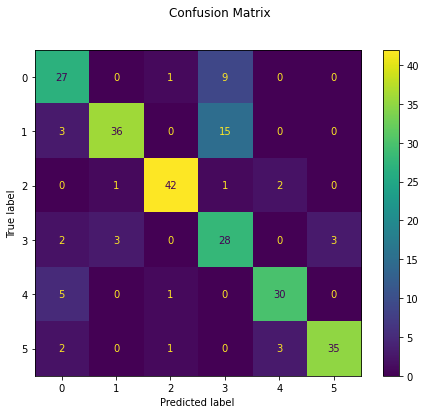

In [16]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams['image.cmap'] = 'Blues'
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.savefig("multinomial_regression_confusion_matrix.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## One-hot Encoding

In [17]:
color = np.array([[0], [1], [2], [3]])
ohe = preprocessing.OneHotEncoder()
color_onehot = ohe.fit_transform(color)
print("Color:\n", color)
print("Color in one-hot\n", color_onehot.toarray())

Color:
 [[0]
 [1]
 [2]
 [3]]
Color in one-hot
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [18]:
def one_hot(y):
    n_classes = len(np.unique(y))
    oh = np.zeros((len(y), n_classes))
    for i, val in enumerate(y):
        oh[i, val] = 1.0
    return oh
oh = one_hot(color)
print("Color:\n", color)
print("Color in one-hot\n", oh)

Color:
 [[0]
 [1]
 [2]
 [3]]
Color in one-hot
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [19]:
def reverse_one_hot(one_hot):
    result = np.argmax(one_hot, axis=1)
    return result.reshape(-1,1)
roh = reverse_one_hot(oh)
print("One-hot:\n", oh)
print("Reverse One-hot:\n", roh)

One-hot:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Reverse One-hot:
 [[0]
 [1]
 [2]
 [3]]


## Classification Report

In [21]:
c_report = metrics.classification_report(y_test, y_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        37
           1       0.90      0.67      0.77        54
           2       0.93      0.91      0.92        46
           3       0.53      0.78      0.63        36
           4       0.86      0.83      0.85        36
           5       0.92      0.85      0.89        41

    accuracy                           0.79       250
   macro avg       0.81      0.80      0.79       250
weighted avg       0.82      0.79      0.80       250



## Digits Dataset 

In [ ]:
digits = datasets.load_digits()
print("Data:", digits.data.shape)
print("Target:", digits.target.shape)
print("Features:", digits.feature_names)
print("Description:", digits.DESCR)
print("Keys:", digits.keys())

In [28]:
X = digits.data 
y = digits.target
print(X.shape)
print(y.shape)
print(np.unique(y))

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


In [42]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y,
                                 train_size = .75,
                                 random_state=0)
print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("y_train classes:", np.unique(y))
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)
print("y_test classes:", np.unique(y))

X_train size: (1347, 64)
y_train size: (1347,)
y_train classes: [0 1 2 3 4 5 6 7 8 9]
X_test size: (450, 64)
y_test size: (450,)
y_test classes: [0 1 2 3 4 5 6 7 8 9]


In [43]:
model = linear_model.LogisticRegression(
               multi_class='multinomial')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [44]:
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

Accuracy Score: 0.9666666666666667
Confusion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.98      0.98        44
           3       0.98      0.98      0.98        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.98      0.98        48
           8       0.94      0.92      0.93        48
           9       0.94      0.98      0.96       